## Question 1: 
#### Is the relationship between btc-eth and btc-usd similar?

I uploaded btc-eth and btc-usd log data between 01.10.2019 and 01.05.2021. I will make transactions at the closing prices.


In [30]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime
from numpy import mean
from numpy import std
from numpy.random import seed
from matplotlib import pyplot


In [24]:
data1 = pd.read_csv("btc-eth.csv")
x1= data1["Close"]
data2= pd.read_csv("btc-usd.csv")
x2=data2["Close"]


df = pd.DataFrame({'BTC-ETH': x1,
                   'BTC-USD': x2,
                   })
df.head()

,BTC-ETH,BTC-USD
0,47.046673,8343.276367
1,46.444679,8393.041992
2,47.146252,8259.992188
3,46.365166,8205.939453
4,46.223022,8151.500488


For each pair, we count the number of events and calculate mean, standard deviation, minimum, quartiles, and maximum closing price.

- There is a 20-month change period.
- The difference between the highest and the lowest BTC-USD price was more than $58.000 in 20 months and The difference between the highest and the lowest BTC-ETH price was more than 38.000 ( one ethereum value against one bitcoin) 

Judging by the exchange of coins, there seems to be a relationship between them, but we need to look at their correlation situation.


In [4]:
df.describe()

,BTC-ETH,BTC-USD
count,575.000000,575.000000
mean,38.145560,18463.780015
std,8.968804,16505.193668
min,19.426006,4970.788086
25%,30.581083,8659.626953
50%,38.222454,9889.424805
75%,45.892427,19172.930664
max,57.531742,63503.457031


We visualize the data in the table above with a box plot. A box plot shows the quartiles of the dataset with points that are determined to be outliers using a method of the inter-quartile range (IQR). In other words, the IQR is the first quartile (25%) subtracted from the third quartile (75%).

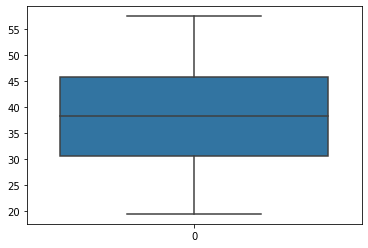

In [5]:
import seaborn as sns
ax = sns.boxplot(data=df['BTC-ETH'], orient="")

When we examine the BTC-ETH closing prices, we see that there is a balance.

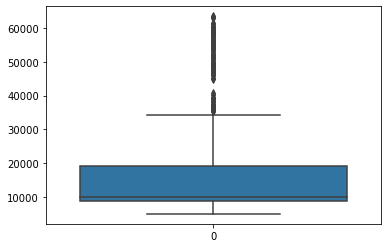

In [5]:
ax = sns.boxplot(data=df['BTC-USD'], orient="")

There is a serious uneven distribution for BTC-USD closing prices.

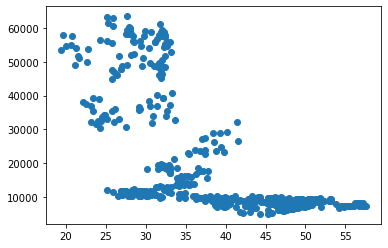

In [6]:
pyplot.scatter(x1, x2)
pyplot.show()

A bivariate scatter chart is created. The disorder can also be seen here. Finally, let's look at their correlations and covariance matrices.

In [6]:
from numpy import cov
x1 = np.nan_to_num(x1)
x2 = np.nan_to_num(x2)
covariance = cov(x1,x2)
covariance

array([[ 8.98829958e+01, -8.53863508e+04],
       [-8.53863508e+04,  2.72879097e+08]])

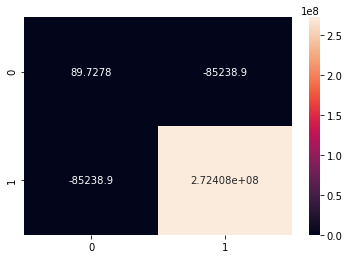

In [7]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

A = x1
B = x2

data = np.array([x1,x2])

covMatrix = np.cov(data,bias=True)
sn.heatmap(covMatrix, annot=True, fmt='g')
plt.show()

There aren’t any relations between variables because of negative state of the coveriance. 

In [8]:
from scipy.stats import pearsonr
x1
x2

corr, _ = pearsonr(x1, x2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.545


# Question 2 : 

 Is there a time delay between BTC-USD and ETH-USD?
 
 How does the increase of one affect the other?

In [2]:
pip install dtaidistance


Note: you may need to restart the kernel to use updated packages.


In [1]:
 pip install dtaidistance[numpy]


zsh:1: no matches found: dtaidistance[numpy]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import matplotlib.pyplot as plt



In [19]:
df1 = pd.read_csv("eth-usd.csv", parse_dates=['Date'])
s1 = np.array(df1[['Close']])
df2 = pd.read_csv("btc-usd.csv", parse_dates=['Date'])
s2 = np.array(df2[['Close']])


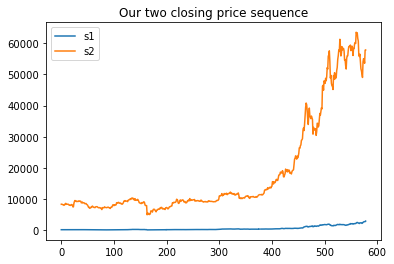

In [14]:
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.title('Our two closing price sequence')
plt.legend()

DTW Distance Measure Between Two Time Series

the distance measure based on two sequences of numbers:

In [15]:
from dtaidistance import dtw
distance = dtw.distance(s1, s2)
print(distance)

nan


DTW Distance Measure all warping paths

In [121]:
from dtaidistance import dtw
distance, paths = dtw.warping_paths(s1, s2)
print(distance)
print(paths)


nan
[[    0.                    inf            inf ...            inf
             inf            inf]
 [           inf  8165.935943   11583.62042194 ...            inf
             inf            inf]
 [           inf 11545.99459531 11581.23042666 ...            inf
             inf            inf]
 ...
 [           inf            inf            inf ...            nan
             nan            nan]
 [           inf            inf            inf ...            nan
             nan            nan]
 [           inf            inf            inf ...            nan
             nan            nan]]


In [125]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
path = dtw.warping_path(s1, s2)
dtwvis.plot_warping(s1, s2, path, filename="warp.png")

(None, None)

this method is not suitable for us